In [1]:
import time
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train_data = np.array(
    pd.read_csv('fashion-mnist_train.csv'), dtype='float32',
)

test_data = np.array(
    pd.read_csv('fashion-mnist_test.csv'), dtype='float32',
)

In [3]:
x_train = train_data[:, 1:] / 255       # images (flat)
y_train = train_data[:, 0]              # labels

x_test = test_data[:, 1:] / 255         # test images
y_test = test_data[:, 0]                # test labels

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345
)

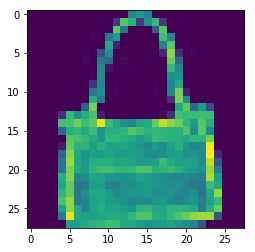

In [4]:
im = x_train[20, :].reshape((28, 28))

plt.imshow(im)
plt.show()

In [5]:
rows = 28
cols = 28
batch_size = 512
image_shape = (rows, cols, 1)
x_train = x_train.reshape((x_train.shape[0], *image_shape))
x_test = x_test.reshape((x_test.shape[0], *image_shape))
x_validate = x_validate.reshape((x_validate.shape[0], *image_shape))

In [6]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
output_model_name = r'tmp\tfboard\tf.ckpt'

tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_3layer-3'), 
    write_graph=True,
    write_grads=True, histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy'],
)

In [16]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1, validation_data=(x_validate, y_validate),
    callbacks=[tensorboard],
)

Train on 48000 samples, validate on 12000 samples


ValueError: No variables to save

In [9]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('    Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

    Test loss: 0.4778
Test accuracy: 0.8309


In [55]:
keras.__version__

'2.1.1'